In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [7]:
original_df = pd.read_csv('cleaned_dataset.csv', sep = ",")
original_df.head()
df = original_df.copy()

In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8333 entries, 0 to 8332
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              8333 non-null   float64
 1   price             8333 non-null   float64
 2   building_status   6195 non-null   object 
 3   number_facades    6649 non-null   float64
 4   number_bedrooms   8269 non-null   float64
 5   kitchen_equipped  5921 non-null   object 
 6   furnished         120 non-null    object 
 7   open_fire         702 non-null    float64
 8   zip_code          8333 non-null   int64  
 9   land_surface      8333 non-null   float64
 10  terrace           8333 non-null   int64  
 11  terrace_surface   8333 non-null   int64  
 12  swimming_pool     382 non-null    object 
 13  property_type     8333 non-null   object 
 14  subtype_property  8333 non-null   object 
 15  garden            8333 non-null   int64  
 16  garden_surface    8333 non-null   int64  


<AxesSubplot:>

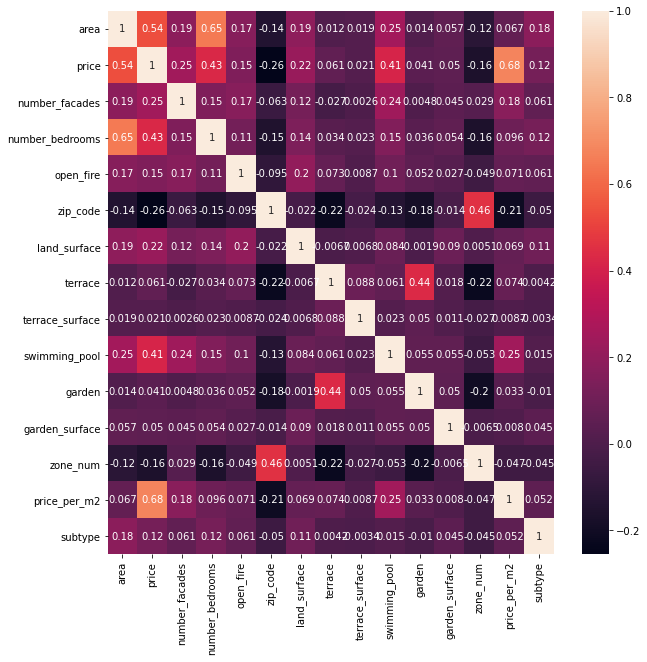

In [61]:
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

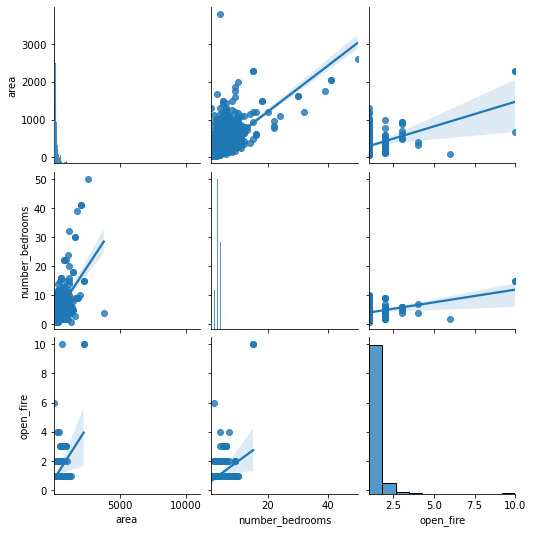

In [58]:
sns.pairplot(original_df, kind = "reg", vars=['area','number_bedrooms', 'open_fire'])

# Removing & Cleaning NaN's

In [13]:
df['swimming_pool'] = df['swimming_pool'].fillna(0)

In [18]:
df['swimming_pool'].unique()

array([0, 1])

In [17]:
df['swimming_pool'] = df['swimming_pool'].replace(True, 1)

In [112]:
df['number_bedrooms'].isnull().sum()

64

In [56]:
df['open_fire'] = df['open_fire'].fillna(0)
df['open_fire'] = df['open_fire'].replace(True, 1)
df.astype({'open_fire': 'int64'}).dtypes

area                float64
price               float64
building_status      object
number_facades      float64
number_bedrooms     float64
kitchen_equipped     object
furnished            object
open_fire             int64
zip_code              int64
land_surface        float64
terrace               int64
terrace_surface       int64
swimming_pool         int64
property_type        object
subtype_property     object
garden                int64
garden_surface        int64
province             object
Zone                 object
zone_num              int64
price_per_m2        float64
subtype               int64
dtype: object

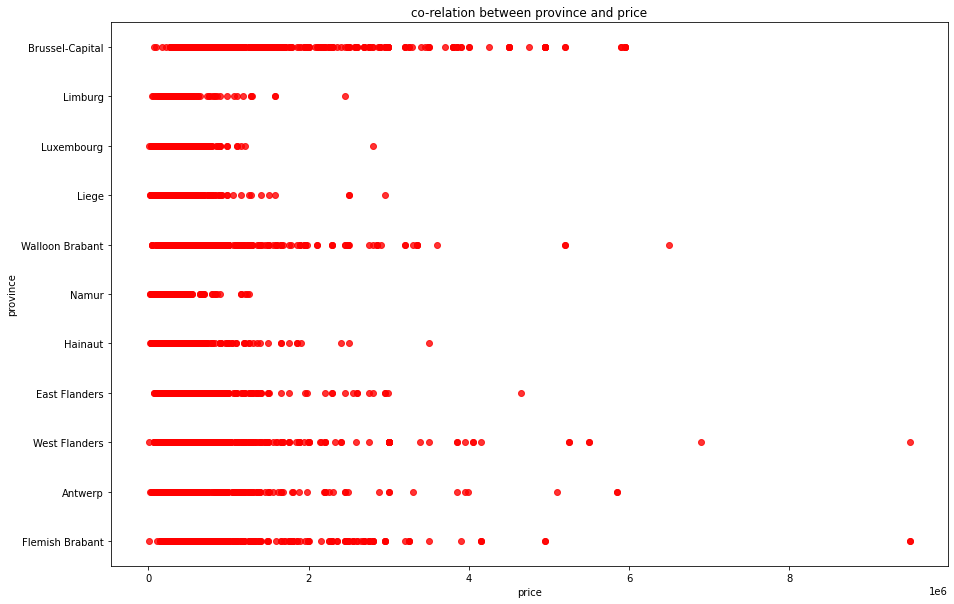

In [39]:
ax, fig = plt.subplots(figsize=(15,10))
plt.scatter(df['price'],df['province'], c='r', alpha = 0.8)
plt.xlabel('price')
plt.ylabel('province')
plt.title('co-relation between province and price')
plt.show()

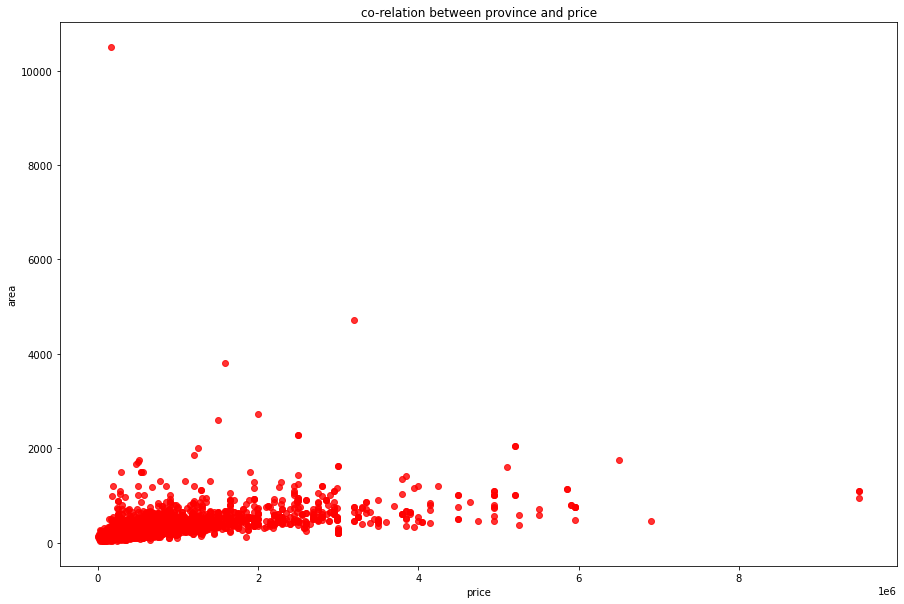

In [43]:
ax, fig = plt.subplots(figsize=(15,10))
plt.scatter(df['price'],df['area'], c='r', alpha = 0.8)
plt.xlabel('price')
plt.ylabel('area')
plt.title('co-relation between province and price')
plt.show()

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='province'>

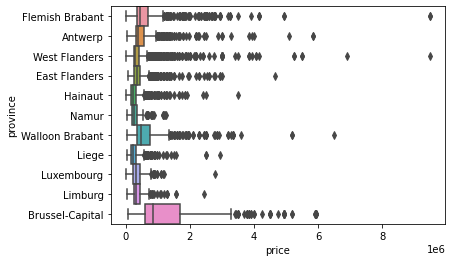

In [48]:
sns.boxplot(df['price'], df['province'], width=1)

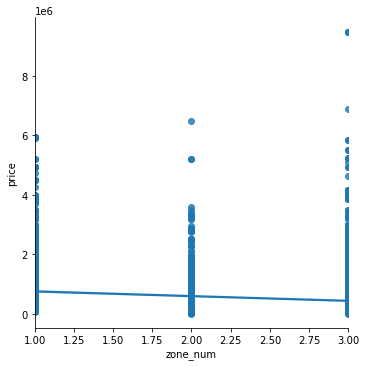

In [52]:
sns.lmplot(x='zone_num', y='price', data=df)

In [60]:
df.corr()

,area,price,number_facades,number_bedrooms,open_fire,zip_code,land_surface,terrace,terrace_surface,swimming_pool,garden,garden_surface,zone_num,price_per_m2,subtype
area,1.000000,0.537828,0.187775,0.647439,0.166783,-0.142494,0.191454,0.012309,0.019304,0.250607,0.013522,0.056707,-0.116933,0.066663,0.181874
price,0.537828,1.000000,0.245039,0.426205,0.148500,-0.255526,0.224538,0.061152,0.021336,0.413321,0.041493,0.050399,-0.158955,0.679959,0.117321
number_facades,0.187775,0.245039,1.000000,0.148683,0.171175,-0.062971,0.118369,-0.027314,0.002643,0.244009,0.004787,0.044578,0.028884,0.176898,0.060564
number_bedrooms,0.647439,0.426205,0.148683,1.000000,0.112800,-0.149316,0.143420,0.033826,0.022547,0.152408,0.035793,0.054460,-0.161691,0.096237,0.122781
open_fire,0.166783,0.148500,0.171175,0.112800,1.000000,-0.094852,0.201404,0.072968,0.008661,0.102608,0.052412,0.027420,-0.048538,0.071382,0.060577
zip_code,-0.142494,-0.255526,-0.062971,-0.149316,-0.094852,1.000000,-0.022216,-0.222627,-0.024430,-0.130991,-0.178348,-0.013610,0.455942,-0.209038,-0.050093
land_surface,0.191454,0.224538,0.118369,0.143420,0.201404,-0.022216,1.000000,-0.006707,0.006807,0.084497,-0.001916,0.090478,0.005064,0.068874,0.105724
terrace,0.012309,0.061152,-0.027314,0.033826,0.072968,-0.222627,-0.006707,1.000000,0.088313,0.060966,0.435326,0.017980,-0.221528,0.074075,0.004230
terrace_surface,0.019304,0.021336,0.002643,0.022547,0.008661,-0.024430,0.006807,0.088313,1.000000,0.022842,0.049607,0.010659,-0.026714,0.008685,-0.003423
swimming_pool,0.250607,0.413321,0.244009,0.152408,0.102608,-0.130991,0.084497,0.060966,0.022842,1.000000,0.055215,0.055461,-0.053145,0.249260,0.015047


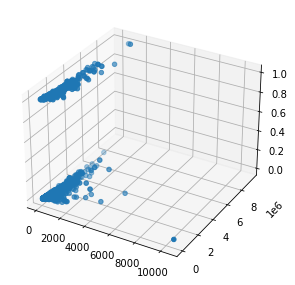

In [62]:
x_1 = df['area']
x_2 = df['swimming_pool']
y_2 = df['price']

#fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x_1, y_2, x_2)

plt.tight_layout()
plt.show()

In [68]:
df_copy = df[['area', 'swimming_pool', 'price']].copy()
df_copy.head()

,area,swimming_pool,price
0,123.0,0,200000.0
1,255.0,0,698000.0
2,234.0,0,499000.0
3,219.0,0,717000.0
4,156.0,0,429000.0


In [69]:
df_copy.corr()

,area,swimming_pool,price
area,1.000000,0.250607,0.537828
swimming_pool,0.250607,1.000000,0.413321
price,0.537828,0.413321,1.000000


# Split the Dataset

In [75]:
y = df_copy['price'].to_numpy() #target
x = df_copy.drop(columns = ['price'], axis = 1).to_numpy() #feature

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.2 , random_state=0)

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [78]:
regressor.fit(X_train, y_train)

#get regression line using the model
regression_line = regressor.predict(x)

In [79]:
regressor.score(X_train, y_train)

0.3594338135420869

In [80]:
y_pred = regressor.predict(X_test)

In [81]:
regressor.score(X_test, y_test)

0.43297979703905476

299000.0    117
275000.0     99
295000.0     96
325000.0     91
349000.0     88
           ... 
156000.0      1
313200.0      1
397479.0      1
436950.0      1
371000.0      1
Name: price, Length: 1432, dtype: int64

In [102]:
df.columns

Index(['area', 'price', 'building_status', 'number_facades', 'number_bedrooms',
       'kitchen_equipped', 'furnished', 'open_fire', 'zip_code',
       'land_surface', 'terrace', 'terrace_surface', 'swimming_pool',
       'property_type', 'subtype_property', 'garden', 'garden_surface',
       'province', 'Zone', 'zone_num', 'price_per_m2', 'subtype'],
      dtype='object')

In [101]:
df['building_status'].value_counts()

good              2199
as new            2070
to renovate        767
to be done up      743
just renovated     377
to restore          39
Name: building_status, dtype: int64

## area, price, building_status, number_facades, land_surface,number_bedrooms, swimming_pool, province